<a href="https://colab.research.google.com/github/Ruqyai/Colab/blob/master/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Learning Objectives:

    

*  Understand Convolutional Neural Networks (CNNs)
*  Train a CNN to classify images from the CIFAR-10 database
*   How to use Checkpoint to save your work 

## Convolutional Neural Networks Example




### 1. Load CIFAR-10 Database

In [0]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Visualize the First 36 Training Images

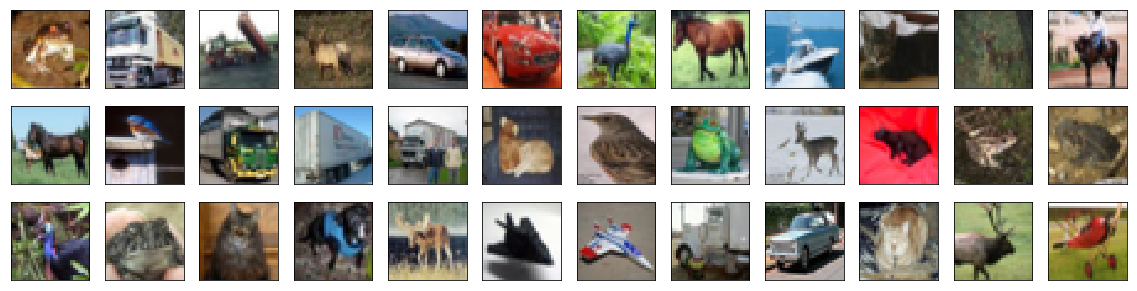

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255
rescale the images make the computing faster

In [0]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [4]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train)) # 10 classes
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


Using TensorFlow backend.


### 5. Define the Model Architecture 

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3))) # 32x32 pixels and depth 3 (colored image RGB)
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
# to pass into a fully connected layers we must Flatten it (Make it a vector)
model.add(Flatten())
model.add(Dense(500, activation='relu')) # 500 is the number of neural network feel free to add more layers
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax')) # 10 is the number of classes

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxP

### 6. Compile the Model 

In [0]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the Model and  use checkpoint to save the best accuracy one .

In [7]:
from keras.callbacks import ModelCheckpoint 
# train the model and save the best accuracy one
checkpoint_path = "CNNs.hdf5" 
checkpointer = ModelCheckpoint(filepath=checkpoint_path, verbose=1, 
                               save_best_only=True)
# feel free to change the epochs number and see the change, I notice there is no changes after the 50th epoch.
hist = model.fit(x_train, y_train, batch_size=32, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 9s - loss: 1.5937 - acc: 0.4219 - val_loss: 1.3999 - val_acc: 0.5048

Epoch 00001: val_loss improved from inf to 1.39986, saving model to CNNs.hdf5
Epoch 2/20
 - 6s - loss: 1.2605 - acc: 0.5487 - val_loss: 1.1548 - val_acc: 0.5834

Epoch 00002: val_loss improved from 1.39986 to 1.15483, saving model to CNNs.hdf5
Epoch 3/20
 - 6s - loss: 1.1383 - acc: 0.5982 - val_loss: 1.0017 - val_acc: 0.6428

Epoch 00003: val_loss improved from 1.15483 to 1.00165, saving model to CNNs.hdf5
Epoch 4/20
 - 6s - loss: 1.0717 - acc: 0.6228 - val_loss: 0.9545 - val_acc: 0.6784

Epoch 00004: val_loss improved from 1.00165 to 0.95446, saving model to CNNs.hdf5
Epoch 5/20
 - 6s - loss: 1.0310 - acc: 0.6406 - val_loss: 1.1651 - val_acc: 0.6066

Epoch 00005: val_loss did not improve from 0.95446
Epoch 6/20
 - 7s - loss: 1.0071 - acc: 0.6516 - val_loss: 1.1279 - val_acc: 0.6342

Epoch 00006: val_loss di

### 8. Load the Model with the Best Validation Accuracy

In [0]:
# load the weights that yielded the best validation accuracy
model.load_weights(checkpoint_path)

### 9. Calculate Classification Accuracy on Test Set

In [9]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6836


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

Text(0.5, 1.0, 'truck')

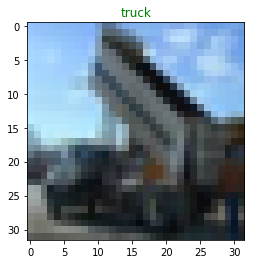

In [10]:
# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# let us visualize random image from the x_test dataset, remember we have 10k test samples
num = 50 
plt.imshow(x_test[num])
predict_image = model.predict(x_test[num].reshape(1,32,32,3)) # 1  = image, 32 = 32,32 pixles, 3 = colored image RGB
idx = np.argmax(predict_image) # get the index of top probability
predict_label = cifar10_labels[idx] #access the list of labels by the index of top prob
plt.title(predict_label, color="green")

### Let us try with a bunch of images and see how the predict going on 

In [0]:
# get predictions on the test set
y_hat = model.predict(x_test)

###Here you can change the **size** in number great than 1 and less than the batch size which in our case 32

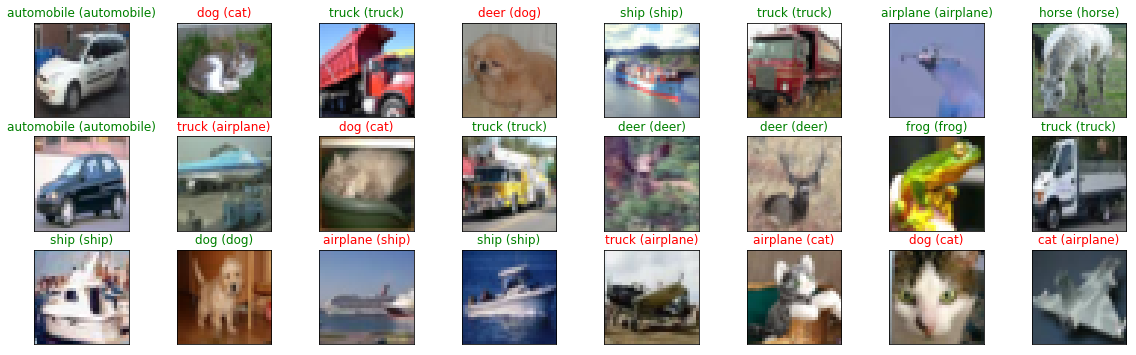

In [12]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=24, replace=False)): 
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))